In [351]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("dark")

In [352]:
map_file = "experiments/maps/map_13.txt"

In [353]:
from src.envs.miniworld.constants import OBJ_MAP, OBSTACLE_MARKER, BLOCK_SCALE, OBJECT_SIZE
obs_offset = BLOCK_SCALE / 2
sq_offset = OBJECT_SIZE * BLOCK_SCALE / 2
def read_miniworld_map(map_file):
    shapes = []
    height = 0
    width = 0
    with open(map_file, 'r') as f:
        map_mat = f.readlines()
    size = len(map_mat)
    print(size)
    for i, l in enumerate(map_mat):
        # I don't consider empty lines!
        l_stripped = l.rstrip()
        if len(l.rstrip()) == 0: continue

        # this is not an empty line!
        height += 1
        for j, e in enumerate(l_stripped):
            if e in OBJ_MAP.keys():
                Entity, color = OBJ_MAP[e]
                if e == OBSTACLE_MARKER:
                    shapes.append(plt.Rectangle((j - obs_offset, size - 1 - i - obs_offset), BLOCK_SCALE, BLOCK_SCALE, fc=color))
                elif Entity.__name__ == "Ball":
                    shapes.append(plt.Circle((j, size - 1 - i), BLOCK_SCALE * OBJECT_SIZE / 2, fc=color))
                elif Entity.__name__ == "Box":
                    shapes.append(plt.Rectangle((j - sq_offset, size - 1 - i - sq_offset), BLOCK_SCALE * OBJECT_SIZE, BLOCK_SCALE * OBJECT_SIZE, fc=color))

        width = max(width, len(l_stripped))
    return shapes, height, width

In [362]:
# df = pd.read_csv("success_map copy.csv")
# df = pd.read_csv("results/miniworld_minecraft/sequence_p1.0/lpopl_dsac/map10/6/success_map.csv")
df_orig = pd.read_json("results/policy0_status.json", orient='index')

In [363]:
df = df_orig.reset_index()
df['i'] = df['index'].apply(lambda x: x.split(', ')[0]).astype(float)
df['j'] = df['index'].apply(lambda x: x.split(', ')[1]).astype(float)
del df['index']
df

,success,true_proposition,steps,i,j
0,False,,1500,1.0,1.0
1,False,,1500,1.0,1.5
2,False,,1500,1.0,2.0
3,True,a,36,1.0,2.5
4,True,a,34,1.0,3.0
...,...,...,...,...,...
356,False,,1500,10.0,8.0
357,False,,1500,10.0,8.5
358,False,,1500,10.0,9.0
359,False,,1500,10.0,9.5


In [364]:
shapes, height, width = read_miniworld_map(map_file)
df_rot = df.copy()
df_rot['i'] = height - df_rot['i'] - 1
# df_rot['j'] = width - df_rot['j']

11


In [365]:
df.head()

,success,true_proposition,steps,i,j
0,False,,1500,1.0,1.0
1,False,,1500,1.0,1.5
2,False,,1500,1.0,2.0
3,True,a,36,1.0,2.5
4,True,a,34,1.0,3.0


In [366]:
a = ["and", ["until", "True", "a"], ["and", ["until", "True", "c"], ["and", ["until", "True", "d"], ["and", ["until", "True", "s"], ["until", "True", ["and", "a", ["next", ["until", "True", "c"]]]]]]]]

In [367]:
# from copilot
def convert_ltl(a):
    if isinstance(a, str):
        return a
    elif isinstance(a, list):
        if a[0] == "and":
            return " & ".join([convert_ltl(a_) for a_ in a[1:]])
        elif a[0] == "until":
            if a[1] == "True":
                return "F(" + convert_ltl(a[2]) + ")"
            else:
                return "U(" + convert_ltl(a[1]) + ", " + convert_ltl(a[2]) + ")"
        elif a[0] == "next":
            return "X(" + convert_ltl(a[1]) + ")"
        elif a[0] == "True":
            return "True"
        else:
            raise NotImplementedError
    else:
        raise NotImplementedError

In [368]:
convert_ltl(a)

'F(a) & F(c) & F(d) & F(s) & F(a & X(F(c)))'

11


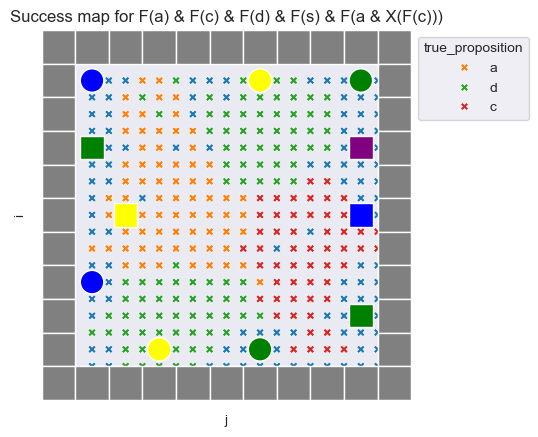

In [369]:
df_success = df_rot[df_rot['success']]
# df_half = df[df['final_ltl'] != df['task']]
shapes, height, width = read_miniworld_map(map_file)
ax = sns.scatterplot(data=df_rot, x="j", y="i", hue="true_proposition", legend="brief", marker='X')
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
for shape in shapes:
    plt.gca().add_patch(shape)
ax.set_xlim([-obs_offset, width-obs_offset])
ax.set_ylim([-obs_offset, height-obs_offset])
ax.set_aspect('equal', adjustable='box')
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.title("Success map for " + convert_ltl(a))
plt.show()